In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spopt
from scipy.stats import norm
import matplotlib.mlab as mlab

f = open("calibration_2.txt","r")
energy = [100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000]

part_abs = 1.5
part_sd = 0.5

# read data
data = []
data_ = []
for line in f:
    if line == '\n':
        data.append(data_)
        data_ = []
    else:
        data_.append(float(line[:-2]))

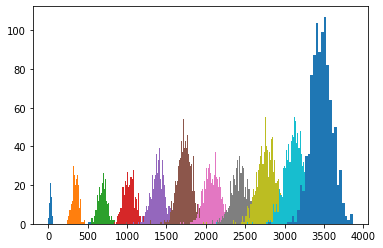

In [2]:
for data_ in data:
    plt.hist(data_, bins=100);
# n, bins, patches = plt.hist(data[5], bins=100);
# print(n)
# print(bins)
# print(patches)

In [3]:
energy_mean= [np.mean(data_) for data_ in data]
energy_std = [np.std(data_) for data_ in data]

a = 0.34761475292551747 +- 0.00020874417889756264
b = -5.3581261629597385 +- 0.39270919493885265


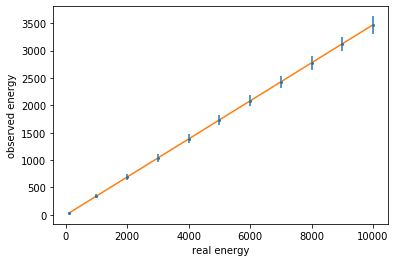

In [4]:
# fit
popt, pcov = spopt.curve_fit(lambda x, a, b: a*x+b, energy, energy_mean, sigma = energy_std)
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
plt.errorbar(energy, energy_mean, fmt='o', markersize=2, yerr=energy_std)
plt.xlabel('real energy')
plt.ylabel('observed energy')
x = np.linspace(energy[0], energy[-1], 500)
plt.plot(x, a*x+b)
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")

In [5]:
def get_real_energy(E_observed):
    return(E_observed - b) / a

In [6]:
f = open("reduction_2.txt","r")
energy_real = [500, 1500, 2500, 3500, 4500, 5500, 6500, 7500, 8500, 9500]


data_reduction = []
data_reduction_ = []
for line in f:
    if line == '\n':
        data_reduction.append(data_reduction_)
        data_reduction_ = []
    else:
        data_reduction_.append(float(line[:-2]))


In [7]:
data_real = [get_real_energy(np.array(data_reduction_)) for data_reduction_ in data_reduction]

# def curve(x, mu, sigma, nevents):
#     return nevents / (np.sqrt(2 * np.pi * sigma**2) * x) * np.exp( - (np.log(x) - mu)**2 / (2 * sigma**2))
def curve(x, mu, sigma, nevents):
    return nevents / (np.sqrt(2 * np.pi * sigma**2)) * np.exp( - (x - mu)**2 / (2 * sigma**2))

sigmas = {}
delta_sigmas = {}

In [8]:
def proc(number, bins0, p0, cut=[0, -1]):
    start, stop = cut
    en = energy_real[number]
    n, bins, patches = plt.hist(data_real[number], bins=bins0);
    bin_centers = bins[:-1] + np.diff(bins) / 2
    bin_centers = bin_centers[start:stop]
    n = n[start:stop]
    
    data_fit_n = []
    data_fit_bin_centers = []
    for i in range(len(n)):
        if n[i] > 0:
            data_fit_n.append(n[i])
            data_fit_bin_centers.append(bin_centers[i])
    
    popt, pcov = spopt.curve_fit(
        curve, data_fit_bin_centers, data_fit_n, p0 = p0,
        bounds = [(0), (10**20)], sigma = np.sqrt(np.array(data_fit_n))
    )
    
    mu, sigma, nevents = popt
    delta_mu, delta_sigma, delta_nevents = np.sqrt(np.diag(pcov))
    
    sigmas[en] = sigma
    delta_sigmas[en] = delta_sigma
    
    print(f"mu = {mu} +- {delta_mu}\nsigma = {sigma} +- {delta_sigma}\nnevents = {nevents} +- {delta_nevents}")
    x = np.linspace(bin_centers[0], bin_centers[-1], 500)
    plt.plot(x, curve(x, mu, sigma, nevents))
    
    print(f"mean = {np.mean(data_real[number])}\nstd = {np.std(data_real[number])}\n\n")


mu = 501.51557475421106 +- 2.5939961341280857
sigma = 82.82157236005388 +- 1.9137279404136731
nevents = 11286.362493508826 +- 348.62644704968113
mean = 501.4179985919833
std = 84.80937855926811




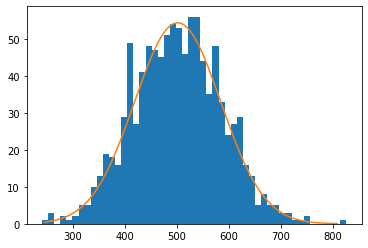

In [9]:
proc(0, 50, [500, 150, 10000])

mu = 1502.3673770287342 +- 4.404097860728888
sigma = 141.79065542801138 +- 3.4733473146363023
nevents = 17472.437837296136 +- 532.4393853267899
mean = 1504.3245358317854
std = 142.06176929741954




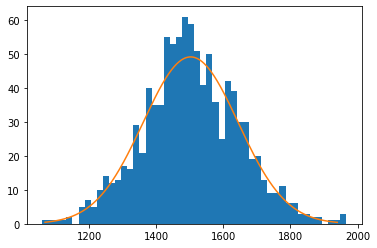

In [10]:
proc(1, 50, [1500, 200, 100000])

mu = 2515.298973964711 +- 5.211737206456859
sigma = 174.273287921049 +- 3.8344406529801263
nevents = 27747.479004660527 +- 819.3543129480896
mean = 2511.1855553783103
std = 181.71780873787816




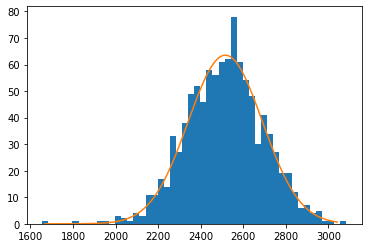

In [11]:
proc(2, 50, [2500, 300, 100000])

mu = 3510.7661335055986 +- 8.100071588121152
sigma = 211.15507436692982 +- 5.982409373904644
nevents = 25560.292845356813 +- 964.0650574634012
mean = 3513.5936529272135
std = 218.9065999530504




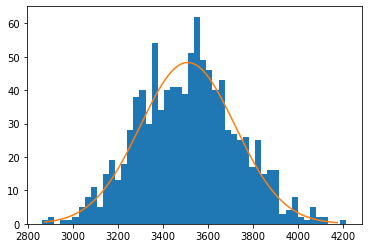

In [12]:
proc(3, 50, [3500, 400, 100000])

mu = 4496.510754696536 +- 9.928860739897987
sigma = 230.84446087095122 +- 7.607791574388792
nevents = 39061.75815732025 +- 1670.6749030663561
mean = 4497.108037925869
std = 245.06703683876762




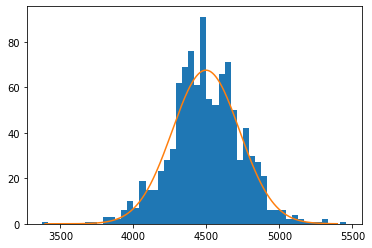

In [13]:
proc(4, 50, [4500, 500, 100000])

mu = 5510.863625226599 +- 10.512512196529602
sigma = 268.7927179731412 +- 7.975914963128041
nevents = 66696.17949059627 +- 2574.588568485803
mean = 5499.043950653447
std = 294.70442115742696




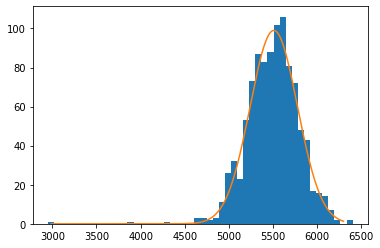

In [14]:
proc(5, 50, [5500, 500, 100000])

mu = 6504.396186532722 +- 9.75911149441468
sigma = 287.17070381495796 +- 7.1982048029682275
nevents = 44857.58679727448 +- 1493.9030040575078
mean = 6507.6379803065065
std = 302.15123015925496




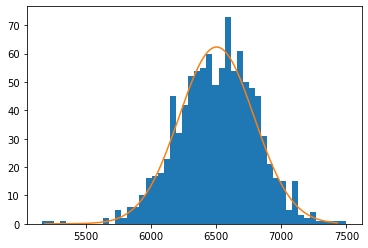

In [15]:
proc(6, 50, [6500, 500, 100000])

mu = 7489.072178245999 +- 7.222694005149154
sigma = 303.2231575454176 +- 5.242813475866838
nevents = 42940.425533790076 +- 1007.7997887723842
mean = 7490.391869532831
std = 311.0043148418807




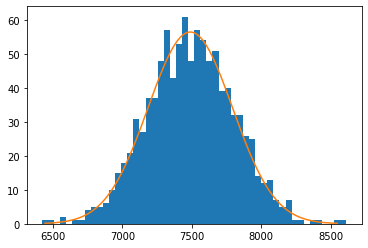

In [16]:
proc(7, 50, [7500, 600, 100000])

mu = 8515.468029616497 +- 11.00998108316341
sigma = 329.0171394602954 +- 8.460065477434567
nevents = 54050.31796315422 +- 1772.6461345218947
mean = 8509.026782320521
std = 348.713739653396




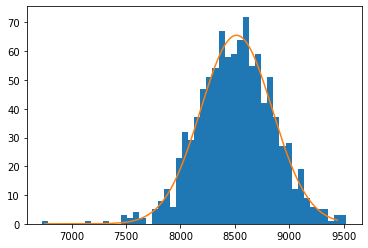

In [17]:
proc(8, 50, [8500, 500, 1000000])

mu = 9499.179816233494 +- 10.726171913113294
sigma = 373.1392120102118 +- 8.535626684609168
nevents = 48614.12663770715 +- 1353.02942170522
mean = 9495.350537438777
std = 376.04311438826534




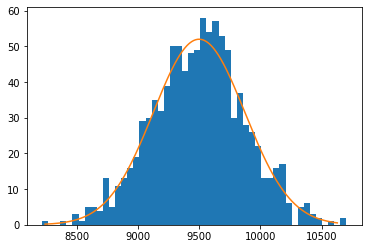

In [18]:
proc(9, 50, [9500, 700, 1000000])

In [19]:
delta_E_to_E = [sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))]

a = -0.0003198434036220119 +- 0.001615320448206138
b = 3.6093721788469044 +- 0.1163796476171258


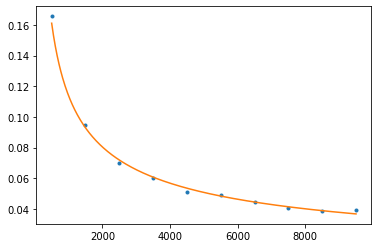

In [20]:
def curve_energy(x, a, b):
    return a + b / np.sqrt(x)

popt, pcov = spopt.curve_fit(curve_energy, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b = popt
delta_a, delta_b = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}")
plt.plot(energy_real, delta_E_to_E, 'o', markersize=3)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy(x, a, b))

In [21]:
file = open('results.txt', 'a+')
file.write(f"{part_abs} {part_sd} {a} {delta_a} {b} {delta_b}\n")
file.close()

a = 0.028669932463594203 +- 0.013588309902605828
b = 5.158904963632503 +- 0.7291951664102247
c = -0.4351175855950342 +- 0.2029550661596958


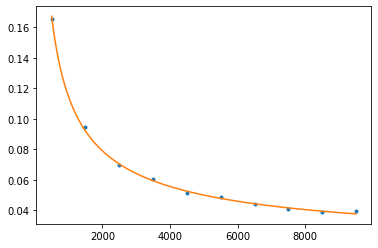

In [22]:
def curve_energy_modified(x, a, b, c):
    return a + b / np.sqrt(x) + c / np.sqrt(np.sqrt(x))

popt, pcov = spopt.curve_fit(curve_energy_modified, energy_real, delta_E_to_E, sigma = [delta_sigmas[energy_real[i]]/energy_real[i] for i in range(len(sigmas))])
a, b, c = popt
delta_a, delta_b, delta_c = np.sqrt(np.diag(pcov))
print(f"a = {a} +- {delta_a}\nb = {b} +- {delta_b}\nc = {c} +- {delta_c}")
plt.plot(energy_real, delta_E_to_E, 'o', markersize=3)
x = np.linspace(energy_real[0], energy_real[-1], 500)
plt.plot(x, curve_energy_modified(x, a, b, c))